# Class Assignment NLP on social media data


In [1]:
import sqlite3
import pandas as pd

con = sqlite3.connect('/Users/mafphd/Documents/Data Science/Regis Grad Certificate/MSDS 600 Intro to Data Science/Week 7/ebikes_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df


,title,link,author,n_comments,score,text
0,"Proof of Concept: It's getting cold out, so I ...",/r/ebikes/comments/dyy9uu/proof_of_concept_its...,professor_pouncey,211,4109,
1,Hope I don't move somewhere with low limits fo...,/r/ebikes/comments/gx8ts8/hope_i_dont_move_som...,ARCtrooper97,72,1240,
2,No noise. No gas. All class. My custom build.,/r/ebikes/comments/o4q7w4/no_noise_no_gas_all_...,enjoy_your_minutes,147,1022,
3,I have Multiple Sclerosis and my ebike has cha...,/r/ebikes/comments/w1hpj9/i_have_multiple_scle...,joeyjojoeshabadoo,83,1013,
4,Lol,/r/ebikes/comments/i2czwr/lol/,johnnyrottenballs,43,948,
...,...,...,...,...,...,...
995,"Night rider. Luna x1, 1200 Lumans on the bar, ...",/r/ebikes/comments/h051i8/night_rider_luna_x1_...,snowystormz,26,134,
996,quick shot from todays ride,/r/ebikes/comments/gnmjmx/quick_shot_from_toda...,LearyDisciple,22,131,
997,My first ebike! Excited to use it to commute t...,/r/ebikes/comments/g254yo/my_first_ebike_excit...,AllieKat7,28,134,
998,50% of my daily commute,/r/ebikes/comments/fs2gjq/50_of_my_daily_commute/,PoB419,12,137,


In [3]:
conda install -c conda-forge textblob vadersentiment -y

Solving environment: done

## Package Plan ##

  environment location: /Users/mafphd/opt/anaconda3

  added / updated specs:
    - textblob
    - vadersentiment


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39h6e9494a_0        1022 KB  conda-forge
    vadersentiment-3.3.2       |     pyhd8ed1ab_0         100 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  vadersentiment     conda-forge/noarch::vadersentiment-3.3.2-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda                               4.13.0-py39h6e9494a_1 --> 4.14.0-py39h6e9494a_0



vadersentiment-3.3.2 | 100 KB    | ##################################### | 100% 
conda-4.14.0         | 1022 KB   | #####################################

In [4]:
from textblob import TextBlob

In [5]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

<AxesSubplot:ylabel='Frequency'>

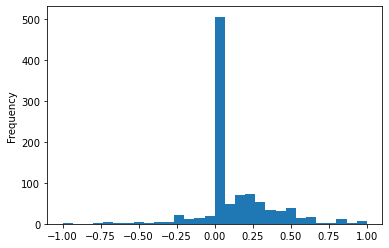

In [6]:
df['tb_sentiment'].plot.hist(bins=30)

In [9]:
df['tb_sentiment'].mean()

0.1083971943161006

In [10]:
df['tb_sentiment'].median()

0.0

In [11]:
import statistics
statistics.stdev(df['tb_sentiment'])

0.24757884243006661

In [13]:
df.nsmallest(n=5, columns=['tb_sentiment'])

,title,link,author,n_comments,score,text,tb_sentiment
101,"I have to say, some of the Facebook ebike grou...",/r/ebikes/comments/wdhjab/i_have_to_say_some_o...,waitwaitdontt3llme,229,335,,-1.000000
756,Made it through sugar cane fields and up an in...,/r/ebikes/comments/hegiu9/made_it_through_suga...,mielieboer,13,153,,-1.000000
364,"Coworkers: ""I hate traffic home"" - Me:",/r/ebikes/comments/9mpcoz/coworkers_i_hate_tra...,Lakus,27,210,,-0.800000
165,Friday morning LA bike ride (because my wife i...,/r/ebikes/comments/ms6otv/friday_morning_la_bi...,daftmonkey,49,281,,-0.757143
440,Sorry for the terrible quality creeper shot - ...,/r/ebikes/comments/d26whp/sorry_for_the_terrib...,Madasiaka,17,195,,-0.750000


In [15]:
df.nlargest(n=5,columns=['tb_sentiment'])

,title,link,author,n_comments,score,text,tb_sentiment
12,"As a Truck Driver, Buying an ebike was the bes...",/r/ebikes/comments/q5esa6/as_a_truck_driver_bu...,-life_starts_now-,63,727,,1.0
353,Getting an e-bike was one of the best decision...,/r/ebikes/comments/ijop0k/getting_an_ebike_was...,LukeVenable,39,212,,1.0
395,Thankfully I was wearing my good helmet!!!,/r/ebikes/comments/tn9ka4/thankfully_i_was_wea...,EERCom,70,200,,1.0
522,“The perfect bike doesn’t ex—-“,/r/ebikes/comments/mf4y8x/the_perfect_bike_doe...,RentalGore,118,178,,1.0
529,ebike + pup = awesome!,/r/ebikes/comments/lq3kgs/ebike_pup_awesome/,nervagon,18,178,,1.0


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(df['title'])

{'neg': 0.048, 'neu': 0.832, 'pos': 0.12, 'compound': 1.0}

# Summary

Text Blob sentiment analysis showed a mean sentiment of .10 and a median of 0. The histogram shows an extremely high number of values between 0 and .10, which explains why the median is slightly lower. Vader sentiment analysis returned a higher compound value of 1.0, but its other highest component was neutral at .832, which seems consistent with the Text Blob scores being close to 0 (the middle/most "neutral" sentiment). Posts with the lowest sentiment scores contain words like "hate" and "terrible", while posts with the highest sentiment scores contain words like "best", "good", and "awesome". An ebike manufacturer might be interested in using sentiment analysis on posts and comments that mention their brand, to see whether ebike riders are talking about that brand in a positive, negative, or neutral light. 